In this competition, Grupo Bimbo invites Kagglers to develop a model to accurately forecast inventory demand based on historical sales data.

Currently, daily inventory calculations are performed by direct delivery sales employees who must single-handedly predict the forces of supply, demand, and hunger based on their personal experiences with each store. With some breads carrying a one week shelf life, the acceptable margin for error is small.

In this competition, you will forecast the demand of a product for a given week, at a particular store. The dataset you are given consists of 9 weeks of sales transactions in Mexico. Every week, there are delivery trucks that deliver products to the vendors. Each transaction consists of sales and returns. Returns are the products that are unsold and expired. The demand for a product in a certain week is defined as the sales this week subtracted by the return next week.

Things to note:

==> There may be products in the test set that don't exist in the train set. This is the expected behavior of inventory data, since there are new products being sold all the time. Your model should be able to accommodate this.

==> There are duplicate Cliente_ID's in cliente_tabla, which means one Cliente_ID may have multiple NombreCliente that are very similar. This is due to the NombreCliente being noisy and not standardized in the raw data, so it is up to you to decide how to clean up and use this information. 

==>The adjusted demand (Demanda_uni_equil) is always >= 0 since demand should be either 0 or a positive value. The reason that Venta_uni_hoy - Dev_uni_proxima sometimes has negative values is that the returns records sometimes carry over a few weeks.


File descriptions:

train.csv — the training set
test.csv — the test set
sample_submission.csv — a sample submission file in the correct format
cliente_tabla.csv — client names (can be joined with train/test on Cliente_ID)
producto_tabla.csv — product names (can be joined with train/test on Producto_ID)
town_state.csv — town and state (can be joined with train/test on Agencia_ID)


Submission File:

For every row in the dataset, submission files should contain two columns: id and Demanda_uni_equi.  The id corresponds to the column of that id in the test.csv.


Data fields:

Semana              Week number (From Thursday to Wednesday)
Agencia_ID          Sales Depot ID
Canal_ID            Sales Channel ID
Ruta_SAK            Route ID (Several routes = Sales Depot)
Cliente_ID          Client ID
NombreCliente       Client name
Producto_ID         Product ID
NombreProducto      Product Name
Venta_uni_hoy       Sales unit this week (integer)
Venta_hoy           Sales this week (unit: pesos)
Dev_uni_proxima     Returns unit next week (integer)
Dev_proxima         Returns next week (unit: pesos)
Demanda_uni_equil   Adjusted Demand (integer) (This is the target you will predict)

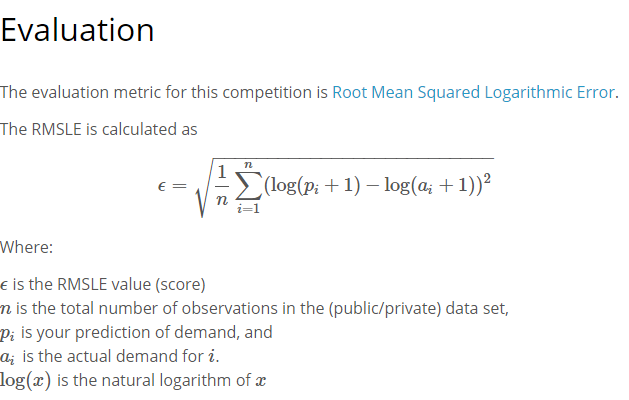

In [13]:
from IPython.display import Image
Image(filename='evaluation_image.png') 

In [ ]:
import pandas as pd

In [4]:
#train.csv
df_train = pd.read_csv("data/train.csv",index_col=None, nrows = 3)
df_train

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4


In [5]:
#test.csv
df_test = pd.read_csv("data/test.csv",index_col=None, nrows = 3)
df_test

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940


In [6]:
#town_state.csv
df_ts = pd.read_csv("data/town_state.csv",index_col=None, nrows = 3)
df_ts

,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO


In [8]:
#cliente_tabla.csv
df_ct = pd.read_csv("data/cliente_tabla.csv",index_col=None, nrows = 5)
df_ct

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


In [9]:
#producto_tabla.csv
df_pt = pd.read_csv("data/producto_tabla.csv",index_col=None, nrows = 5)
df_pt

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [10]:
#sample_submission.csv
df_ss = pd.read_csv("data/sample_submission.csv",index_col=None, nrows = 5)
df_ss

,id,Demanda_uni_equil
0,0,7
1,1,7
2,2,7
3,3,7
4,4,7
